In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
!unzip "/content/archive (6).zip" -d "insurance"

Archive:  /content/archive (6).zip
  inflating: insurance/insurance.csv  


In [3]:
df =pd.read_csv("/content/insurance/insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


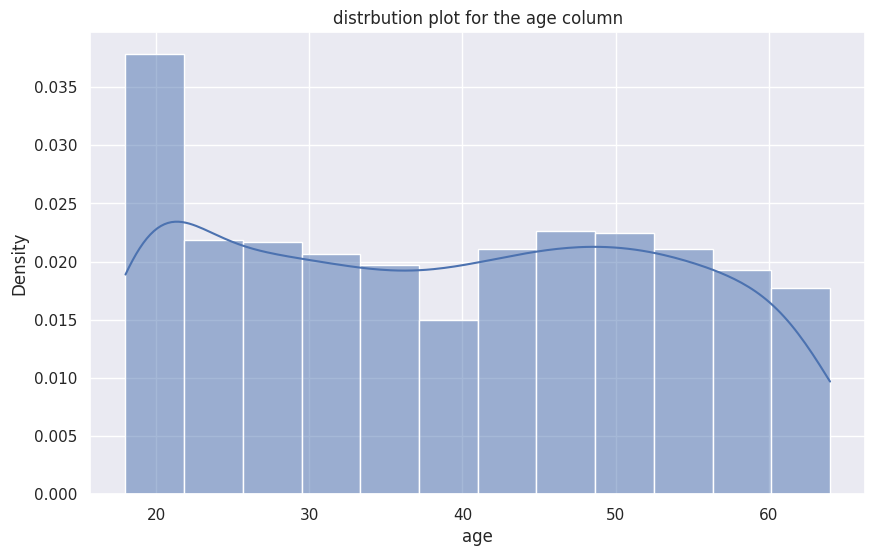

In [16]:
sns.set()
plt.figure(figsize=[10,6])
sns.histplot(df["age"],kde=True,stat="density")
plt.title("distrbution plot for the age column")
plt.show()

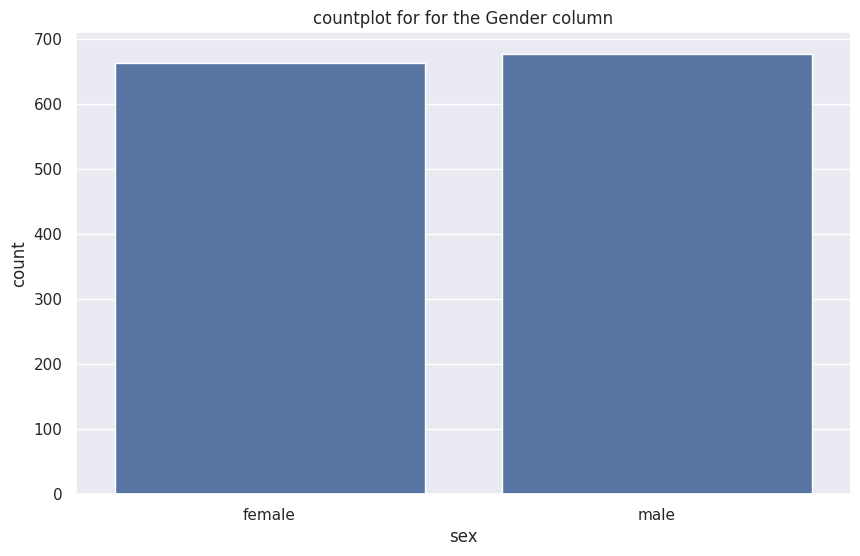

In [20]:
sns.set()
plt.figure(figsize=[10,6])
sns.countplot(data=df,x=df.sex)
plt.title("countplot for for the Gender column")
plt.show()

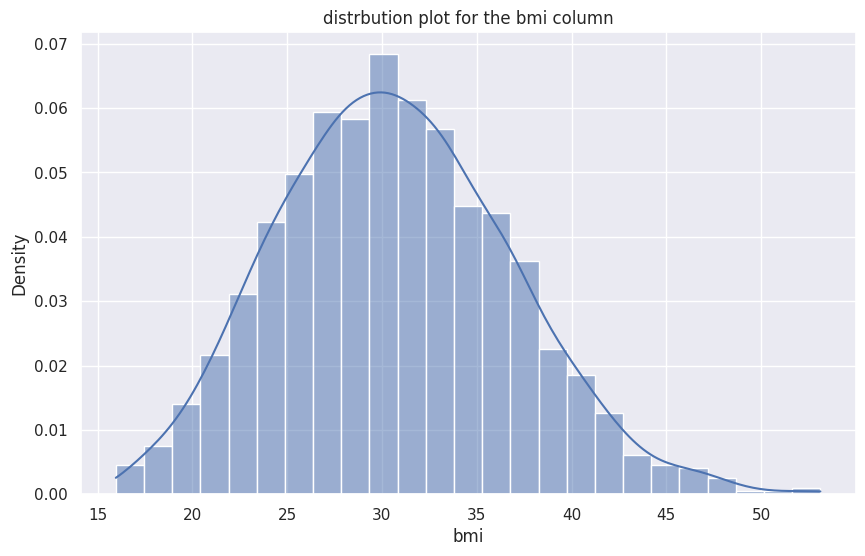

In [21]:
sns.set()
plt.figure(figsize=[10,6])
sns.histplot(df["bmi"],kde=True,stat="density")
plt.title("distrbution plot for the bmi column")
plt.show()

In [22]:
label=df.charges
data=df.drop(columns=["charges"])

In [24]:
categorical_data=data.select_dtypes(include=["O"])

In [26]:
categorical_data.shape

(1338, 3)

In [29]:
OHE=OneHotEncoder(sparse=False,drop="first")
encoded_data=OHE.fit_transform(categorical_data)
encoded_data=pd.DataFrame(encoded_data,columns=OHE.get_feature_names_out(categorical_data.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
encoded_data

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,1.0


In [32]:
training_data=pd.concat([encoded_data,data.drop(columns=categorical_data.columns,axis=1)],axis=1)

In [33]:
training_data

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0.0,1.0,0.0,0.0,1.0,19,27.900,0
1,1.0,0.0,0.0,1.0,0.0,18,33.770,1
2,1.0,0.0,0.0,1.0,0.0,28,33.000,3
3,1.0,0.0,1.0,0.0,0.0,33,22.705,0
4,1.0,0.0,1.0,0.0,0.0,32,28.880,0
...,...,...,...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0,50,30.970,3
1334,0.0,0.0,0.0,0.0,0.0,18,31.920,0
1335,0.0,0.0,0.0,1.0,0.0,18,36.850,0
1336,0.0,0.0,0.0,0.0,1.0,21,25.800,0


In [49]:
x_train,x_test,y_train,y_test=train_test_split(training_data,label,test_size=0.2,random_state=42,shuffle=True)

In [50]:
print(x_train.shape)
print(x_test.shape)

(1070, 8)
(268, 8)


In [51]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [52]:
pred=model.predict(x_train)
error=r2_score(pred,y_train)
print(f"the r squart of the training data is {error}")

the r squart of the training data is 0.6517924963197976


In [53]:
pred=model.predict(x_test)
error=r2_score(pred,y_test)
print(f"the r squart of the test data is {error}")

the r squart of the test data is 0.7088351277198364
